In [16]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import numpy as np
import cv2
import os
# import the required modules and functions

In [17]:
# read images from every folders, label them, and return them in numpy arrayss
def load_data(superpath: str) -> tuple: # [ndarray, ndarray]
  imgs, labels, label = [], [], 0
  for folder in os.listdir(superpath):
    if folder is not None and os.path.isdir(os.path.join(superpath, folder)):
      for image in os.listdir(os.path.join(superpath, folder)): 
        img = cv2.imread(os.path.join(superpath, folder, image), 0) # 0 indicates that the image is read in greyscale mode 
        if img is not None: imgs.append(img), labels.append(label) # check if the image is corrupted
      print(f"{folder}: {label}")
      label += 1
  return np.array(imgs), np.array(labels)

In [18]:
def process_data(x_train: np.ndarray, y_train: np.ndarray) -> tuple:
  x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)
  x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.2)
  x_train, x_test, x_val = x_train.reshape(25838, 48, 48, 1), x_test.reshape(2296, 48, 48, 1), x_val.reshape(575, 48, 48, 1)
  x_train, x_test, x_val = x_train/255, x_test/255, x_val/255
  y_train, y_test, y_val = keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test), keras.utils.to_categorical(y_val)
  return x_train, x_test, y_train, y_test, x_val, y_val
  # Splits the data into validation, test, and training set. Divides images by 255 to maximize 
  # performance and binary-matrixizes(is that a word?) to the labels

In [19]:
x_train, y_train = load_data('/content/emotiondetection')

sad: 0
disgusted: 1
surprised: 2
fearful: 3
neutral: 4
angry: 5
happy: 6


In [20]:
x_train, x_test, y_train, y_test, x_val, y_val = process_data(x_train, y_train)

In [21]:
print(x_train.shape, x_test.shape, x_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(25838, 48, 48, 1) (2296, 48, 48, 1) (575, 48, 48, 1)
(25838, 7) (2296, 7) (575, 7)


In [22]:
model = keras.Sequential([
                    
                    keras.layers.InputLayer(input_shape=(48, 48, 1)),
                    keras.layers.Conv2D(128, (5,5), padding='same', kernel_initializer='he_uniform'),
                    keras.layers.MaxPool2D((2,2), padding='same'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    keras.layers.Conv2D(128, (5,5), padding='same', kernel_initializer='he_uniform'),
                    keras.layers.MaxPool2D((2,2), padding='same'),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5), 

                    keras.layers.Conv2D(128, (3,3)),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    # keras.layers.Conv2D(128, (3,3)),
                    # keras.layers.BatchNormalization(),
                    # keras.layers.Activation('relu'),
                    # keras.layers.Dropout(0.5),                    

                    keras.layers.Flatten(),

                    keras.layers.Dense(64),
                    keras.layers.BatchNormalization(),
                    keras.layers.Activation('relu'),
                    keras.layers.Dropout(0.5),

                    keras.layers.Dense(7),
                    keras.layers.Activation('softmax') 

])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 128)       3328      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)      

In [24]:
model.compile('Adam', 'categorical_crossentropy', metrics=['accuracy'])

In [25]:
class special_callback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("val_loss") <= 1: 
      print("Stopping training: validation loss <= 1")
      self.model.stop_training = True

stopper = special_callback()
# callback to stop training if validation accuracy is over 60%

In [26]:
data = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), callbacks=[stopper])

Epoch 1/60
808/808 [==============================] - 10s 11ms/step - loss: 1.7809 - accuracy: 0.3169 - val_loss: 1.4976 - val_accuracy: 0.4174
Epoch 2/60
808/808 [==============================] - 9s 11ms/step - loss: 1.4759 - accuracy: 0.4309 - val_loss: 1.4729 - val_accuracy: 0.3948
Epoch 3/60
808/808 [==============================] - 9s 11ms/step - loss: 1.3947 - accuracy: 0.4674 - val_loss: 1.3298 - val_accuracy: 0.4765
Epoch 4/60
808/808 [==============================] - 9s 11ms/step - loss: 1.3408 - accuracy: 0.4902 - val_loss: 1.2812 - val_accuracy: 0.4974
Epoch 5/60
808/808 [==============================] - 9s 11ms/step - loss: 1.3047 - accuracy: 0.5085 - val_loss: 1.2652 - val_accuracy: 0.4939
Epoch 6/60
808/808 [==============================] - 9s 11ms/step - loss: 1.2701 - accuracy: 0.5235 - val_loss: 1.2222 - val_accuracy: 0.5409
Epoch 7/60
808/808 [==============================] - 9s 11ms/step - loss: 1.2422 - accuracy: 0.5300 - val_loss: 1.3971 - val_accuracy: 0.464

In [30]:
model.evaluate(x_test, y_test)

72/72 [==============================] - 0s 5ms/step - loss: 1.0296 - accuracy: 0.6206


[1.029565453529358, 0.6206446290016174]

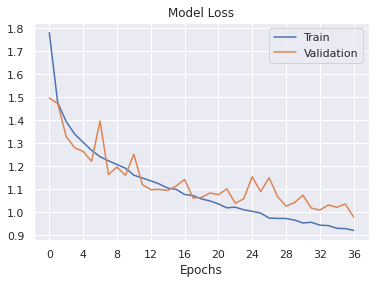

In [39]:
sns.set()
plt.yticks(np.arange(0, 2, 0.1))
plt.xticks(np.arange(0, 40, 4))
plt.xlabel("Epochs")
plt.title("Model Loss")
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')

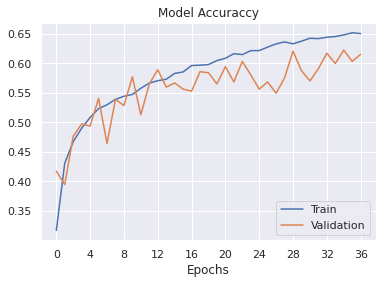

In [38]:
plt.xticks(np.arange(0, 40, 4))
plt.yticks(np.arange(0.3, 1, 0.05))
plt.xlabel("Epochs")
plt.title("Model Accuraccy")
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='lower right')

In [33]:
model.save("emotion_detection_one.h5")